In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
# Used to build and deploy machine learning apps
import tensorflow as tf
import keras
# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from keras import layers
from tensorflow import math
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib 
import os
import zipfile

In [ ]:
ls

In [ ]:
files = 'Dataset'

In [ ]:
def display_random_img(dir,class_name):
    img_dir = dir + '/' + class_name
    files = os.listdir(img_dir)
    
    for i in range(5):
        img_file = random.choice(files)
        img = mpimg.imread(os.path.join(img_dir, img_file))
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
        print(f'Image Shape is: {img.shape}')
        plt.show()

Image Shape is: (536, 800, 3)


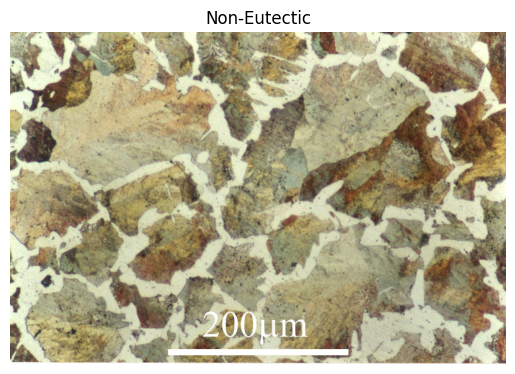

Image Shape is: (500, 500)


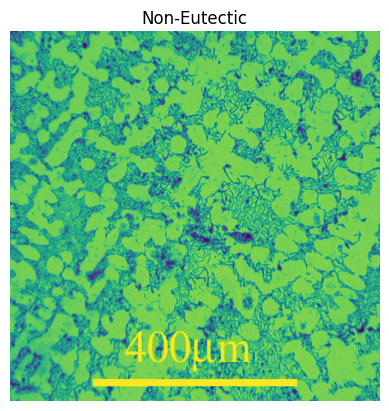

Image Shape is: (532, 800, 3)


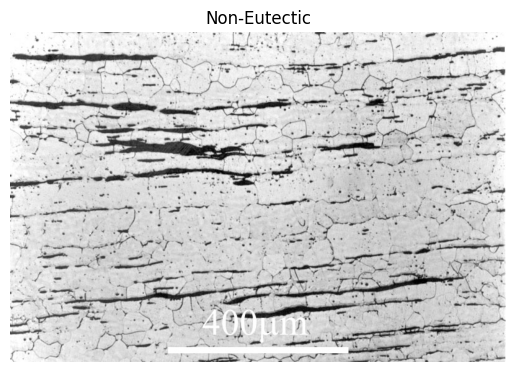

Image Shape is: (538, 800, 3)


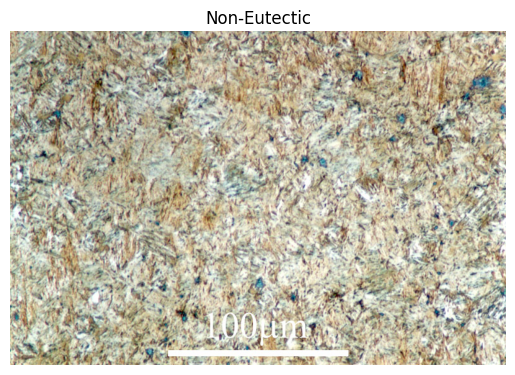

Image Shape is: (500, 500, 3)


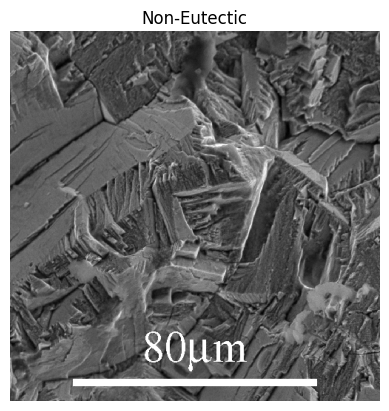

In [49]:
display_random_img(files+'/train','Non-Eutectic')

In [ ]:
# Setup train & test directories
train_dir = os.path.join(files,"train")
validation_dir = os.path.join(files,"val")

In [ ]:
# Normalize from 0 to 255 to 0 to 1 
train_IDG = ImageDataGenerator(rescale=1/255)
validation_IDG = ImageDataGenerator(rescale=1/255)

# Load data and turn it into batches
train_data = train_IDG.flow_from_directory(train_dir,
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode="categorical") # Multi-class instead of binary

In [ ]:
# Create model
model_1 = Sequential([
    Conv2D(10,3,input_shape=(256,256,3)),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(2),
    Activation(activation="softmax") # 3 output neurons
])

# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, # 3 classes
                        epochs=5,
                        steps_per_epoch=len(train_data) # Take enough steps to go through all batches
    )

In [ ]:
# Plot loss and accuracy
pd.DataFrame(history_2.history).plot(figsize=(20, 10))

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.4)
])

In [ ]:
#create 2nd model using augmentations
model_2 = Sequential([
    data_augmentation,
    Conv2D(10, 3, input_shape=(256, 256, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Dropout(0.25),  # Adding dropout layer with a dropout rate of 0.25
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dropout(0.2),  # Adding dropout layer with a dropout rate of 0.5
    Dense(2),
    Activation(activation="softmax")])  # 2 output neurons

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # 2 classes
                        epochs=20,
                        steps_per_epoch=len(train_data)) # Take enough steps to go through all batches

In [38]:
#testing done on test_data
test_dir = os.path.join(files,'test')
test_data = validation_IDG.flow_from_directory(test_dir,
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode="categorical")
model_2.evaluate(test_data)

Found 5 images belonging to 2 classes.
1/1 [==============================] - 1s 528ms/step - loss: 0.9640 - accuracy: 0.4000


[0.9640156030654907, 0.4000000059604645]

In [39]:
def normalize_and_resize(img_loc):
    # With Google Colab
    # my_img = tf.io.read_file(img_loc)

    # Read in image
    my_img = tf.io.read_file(img_loc)

    # Turn file into a tensor
    my_img = tf.image.decode_image(my_img)

    # Resize image
    my_img = tf.image.resize(my_img, size=[256, 256])

    # Normalize data
    my_img = my_img / 255

    return my_img

In [41]:
class_names = ['Eutectic','Non-eutectic']
image = normalize_and_resize("/Users/maniksinghsarmaal/Downloads/sem6/Eutectic:Non-eutectic/Dataset/test/Non-Eutectic/t5.jpeg")
prediction = model_2.predict(tf.expand_dims(image, axis=0))
print(f'The Image provided is : {class_names[np.argmax(prediction)]}')

1/1 [==============================] - 0s 97ms/step
The Image provided is : Eutectic


In [ ]:
model_path = "model_basic"

# Save the model
tf.keras.models.save_model(model_2, model_path)

In [42]:
import tensorflow_hub as hub
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
# Download ResNet model and save as Keras layer
# Trainable : False means we don't want to train it further
resnet_layer = hub.KerasLayer(resnet_url,
                            trainable=False,
                            input_shape=(256,256,3))

# Create model
resnet_model=tf.keras.Sequential([
    # Puts images through downloaded model first
    resnet_layer,
    # Define we will use 20 classes
    Dense(2,
        activation="softmax")
])

In [44]:
resnet_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [45]:

# Fit the model
history_2 = resnet_model.fit(train_data, # 2 classes
                        epochs=5,
                        steps_per_epoch=len(train_data)) # Take enough steps to go through all batches

Epoch 1/5
5/5 [==============================] - 14s 2s/step - loss: 0.6274 - accuracy: 0.6938
Epoch 2/5
5/5 [==============================] - 14s 3s/step - loss: 0.3847 - accuracy: 0.8687
Epoch 3/5
5/5 [==============================] - 13s 3s/step - loss: 0.2729 - accuracy: 0.9125
Epoch 4/5
5/5 [==============================] - 14s 3s/step - loss: 0.2186 - accuracy: 0.9312
Epoch 5/5
5/5 [==============================] - 15s 3s/step - loss: 0.1798 - accuracy: 0.9438


In [47]:
model_path = "resnet_eutectic"

# Save the model
tf.keras.models.save_model(resnet_model, model_path)

INFO:tensorflow:Assets written to: resnet_eutectic/assets


INFO:tensorflow:Assets written to: resnet_eutectic/assets
